# MODEL TRAINING FOR RIDGE LASSO AND ELASTIC NET

In [1]:
import pandas as pd
df = pd.read_csv('/content/Algerian_forest_fires_cleaned_dataset.csv')

In [2]:
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [3]:
df.drop(['index','day','month','year'],axis=1,inplace = True)

In [4]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [5]:
import numpy as np
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [7]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [8]:
# independent and dependent variable
x = df.drop(['FWI'],axis = 1)
y = df['FWI']

In [9]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0.0


In [10]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [11]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 40)

In [12]:
x_train.shape,x_test.shape

((182, 11), (61, 11))

In [13]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.670895,-0.309967,-0.323933,0.678800,0.510329,0.409550,0.631343,0.484508,0.542602,0.223795
RH,-0.670895,1.000000,0.242079,0.250252,-0.703033,-0.424401,-0.240701,-0.741406,-0.364836,-0.520424,-0.390832
Ws,-0.309967,0.242079,1.000000,0.272414,-0.227417,-0.007541,0.056127,-0.029194,0.019347,-0.129204,-0.137189
Rain,-0.323933,0.250252,0.272414,1.000000,-0.511986,-0.291812,-0.300094,-0.339451,-0.300894,-0.378860,-0.043905
FFMC,0.678800,-0.703033,-0.227417,-0.511986,1.000000,0.625271,0.523760,0.750848,0.609133,0.798691,0.206310
DMC,0.510329,-0.424401,-0.007541,-0.291812,0.625271,1.000000,0.887003,0.666945,0.982374,0.599226,0.169910
DC,0.409550,-0.240701,0.056127,-0.300094,0.523760,0.887003,1.000000,0.483607,0.947206,0.508630,-0.093126
ISI,0.631343,-0.741406,-0.029194,-0.339451,0.750848,0.666945,0.483607,1.000000,0.623279,0.744079,0.293776
BUI,0.484508,-0.364836,0.019347,-0.300894,0.609133,0.982374,0.947206,0.623279,1.000000,0.594729,0.064223
Classes,0.542602,-0.520424,-0.129204,-0.378860,0.798691,0.599226,0.508630,0.744079,0.594729,1.000000,0.195667


# FEATURE SELECTION

<Axes: >

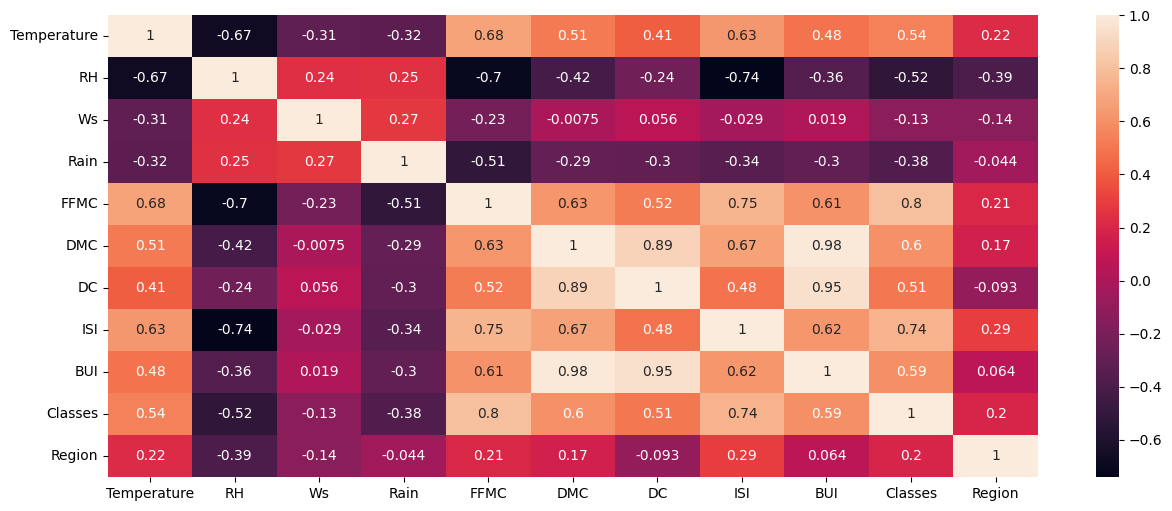

In [14]:
# check for multicollinearity if more than two features are related
# remove one of them
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,6))
corr = x_train.corr()
sns.heatmap(corr,annot=True)

In [15]:
# making a function to remove those features which are correlted
# more than our threshold(given by us)
def correlation(dataset,threshold):
  col_set = set()
  col_matrix = dataset.corr()
  for i in range (len(col_matrix.columns)):
    for j in range(i):
      if abs(col_matrix.iloc[i,j])>threshold:
        colname = col_matrix.columns[i]
        col_set.add(colname)
  return col_set


In [16]:
co_related_feature = correlation(x_train,0.85)

In [17]:
co_related_feature

{'BUI', 'DC'}

In [18]:
# drop those features those corelation is more than 0.85
x_train.drop(co_related_feature,axis = 1,inplace =True)
x_test.drop(co_related_feature,axis = 1,inplace = True)

In [19]:
x_train.shape,x_test.shape

((182, 9), (61, 9))

# FEATURE SCALING AND STANDARDIZATION

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
x_train_scaled

array([[ 1.39492742, -1.67155938, -0.88951589, ...,  1.57247507,
         0.89553347,  1.06825862],
       [-0.84433865,  1.63881938, -0.19170601, ..., -1.05082345,
        -1.11665285,  1.06825862],
       [-0.28452213,  0.57949817,  0.50610387, ...,  0.47753308,
         0.89553347,  1.06825862],
       ...,
       [-0.56443039,  0.71191332, -0.19170601, ...,  0.18098629,
         0.89553347, -0.93610291],
       [-0.28452213, -0.01637   , -0.19170601, ..., -0.22961696,
         0.89553347,  1.06825862],
       [ 0.8351109 , -0.47982303, -0.54061095, ...,  0.59158954,
         0.89553347, -0.93610291]])

<ipython-input-22-7ada56e6da32>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'x_train_after_scaling')

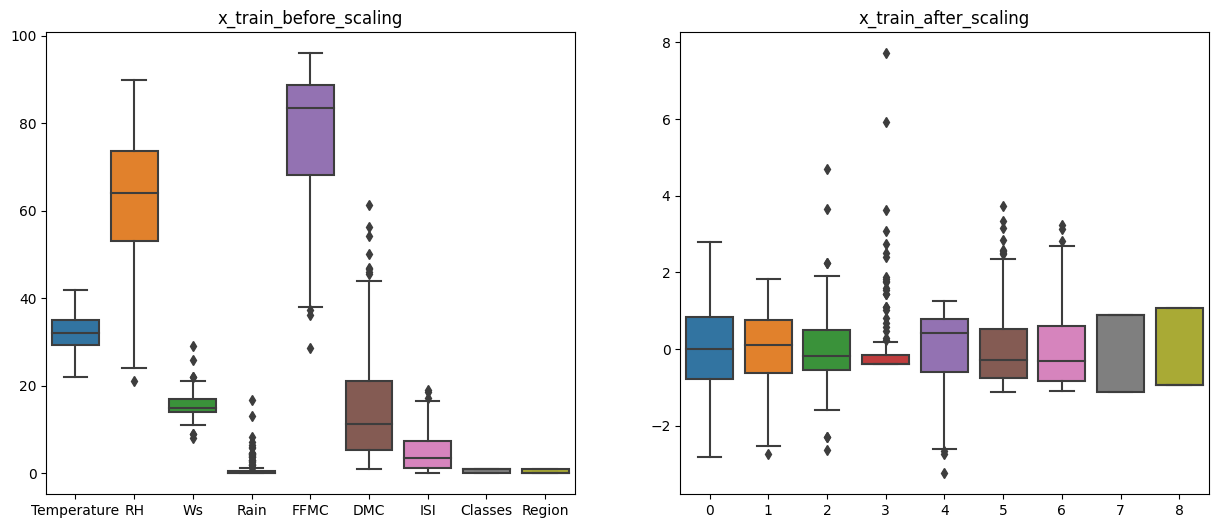

In [22]:

plt.subplots(figsize = (15,6))
plt.subplot(1,2,1)
sns.boxplot(data = x_train)
plt.title('x_train_before_scaling')
plt.subplot(1,2,2)
sns.boxplot(data = x_train_scaled)
plt.title('x_train_after_scaling')

# LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_scaled,y_train)
y_pred = regressor.predict(x_test_scaled)

In [ ]:
y_pred

array([12.45591708,  9.50122676,  0.02784969,  4.2171822 , -0.3464102 ,
        0.49222295,  2.90135615,  7.11605103, 12.31928511,  6.89955288,
       11.21604033,  1.71608248,  4.1551897 , 27.14768128,  8.11665992,
        0.91199855, 17.02274635, 10.79393077, 11.887794  ,  6.57182364,
        7.84845269, -0.03246711,  5.20680813,  6.66080653,  2.18329257,
        0.64451736, 13.17014313,  8.28619931,  1.28036182,  6.66580074,
       -0.67323675,  9.81960831,  3.745502  ,  0.25389158,  7.12377047,
        0.26747988,  0.43958803,  3.10212444,  1.24714638, 11.19410147,
        1.77113942, 25.45246393,  5.3624236 ,  2.46837465,  6.71605436,
        3.1866294 ,  7.27771545,  0.84996598, 14.27781948, 16.59212383,
       24.43414208,  0.13071281,  1.64153427, 19.18765206,  9.75804133,
       -0.13148329,  0.04232702, 13.97432368,  0.1941581 ,  3.17162668,
        1.3393395 ])

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print(mae)
print(mse)

0.5340854472870477
0.5325870024930266


In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.9884784293605


# LASSO REGRESSION

In [23]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred = lasso.predict(x_test_scaled)
y_pred

array([11.28858133,  9.60115164,  2.14420977,  4.42604327,  1.79199069,
        2.40894746,  4.31185876,  6.93624578, 12.00131981,  6.63098925,
       10.8502461 ,  2.61290688,  5.59434575, 23.97032456,  7.73875917,
        2.45752092, 15.71297163, 10.54455266, 11.55746919,  6.61785614,
        7.89897791, -0.10447691,  5.79532903,  6.58885948,  3.58393934,
        2.04867376, 12.53147779,  8.55806444,  2.62926184,  7.25531802,
        1.17571655,  9.84333637,  4.42604327,  2.33528179,  6.99380219,
        2.51668826,  2.72963063,  3.48840333,  2.83737143, 10.29567852,
        3.23401381, 22.57297045,  6.13627162,  4.11341472,  6.67150809,
        4.35076667,  7.064246  ,  2.19600509, 12.82960801, 14.70810973,
       21.82894178,  0.72635054,  3.47619854, 17.54568482,  9.10965586,
        0.40405644, -0.57088049, 13.34136321,  0.22264997,  3.96930524,
        3.2777545 ])

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print(mae)
print(mse)

1.1980295954841222
2.330163629561443


In [25]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)


0.9495910626171593


# RIDGE REGRESSION

In [26]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred = ridge.predict(x_test_scaled)
y_pred


array([12.45170354,  9.53176984,  0.12007638,  4.25147291, -0.28498751,
        0.56475851,  2.90143833,  7.12174271, 12.31888325,  6.94550458,
       11.2377558 ,  1.67628433,  4.19665962, 27.05225994,  8.15065473,
        0.97679335, 17.00337727, 10.84636042, 11.89892336,  6.6840496 ,
        7.94397657, -0.11082957,  5.31360459,  6.66745327,  2.21674898,
        0.67753312, 13.17863059,  8.31073717,  1.33286708,  6.70962783,
       -0.66202745,  9.84790075,  3.87498517,  0.30920973,  7.14014704,
        0.30851739,  0.46520989,  3.15533228,  1.27202955, 11.17693475,
        1.82623487, 25.36465728,  5.42575266,  2.55976207,  6.7365013 ,
        3.23032001,  7.3077589 ,  0.89636798, 14.26212842, 16.57025328,
       24.32793943,  0.14750065,  1.69712389, 19.126786  ,  9.78240028,
       -0.15899803, -0.09147305, 13.9603261 ,  0.13502923,  3.24207053,
        1.38007528])

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print(mae)
print(mse)

0.5458273128650651
0.5514555572562239


In [28]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.98807024180513

# ELASTICNET REGRESSION

In [29]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(x_train_scaled,y_train)
y_pred = elasticnet.predict(x_test_scaled)
y_pred

array([11.44814052, 10.01457274,  3.56397457,  5.74299231,  1.99594745,
        3.33792851,  4.02283408,  6.90054741, 12.29350644,  7.5203435 ,
       10.97992965,  2.94325181,  5.82492623, 21.1473832 ,  8.26839499,
        2.98742524, 14.77834409, 11.46670402, 11.60698323,  8.47985241,
        9.88172469, -0.44497145,  8.20115808,  6.74857567,  4.66453111,
        2.0661947 , 12.24835321,  8.69304692,  3.25411118,  8.03147626,
        2.01916766,  9.97599589,  7.06074542,  3.02333623,  7.8543033 ,
        2.8724011 ,  2.79601272,  5.25696316,  2.87779357, 10.07099458,
        3.77308324, 20.02111686,  7.35965906,  5.09695574,  7.77056295,
        5.42178513,  7.79707681,  3.33387948, 12.28221039, 13.77644256,
       18.69733629,  0.78618548,  3.47290575, 15.83741619,  9.64234152,
        0.55024877, -1.59202235, 13.52026838, -0.12620836,  4.43128054,
        4.13260017])

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print(mae)
print(mse)

1.895814026453772
5.885495390453814


In [31]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.8726777961682366

# PICKLING

In [32]:
import pickle
# accuracy of ridge model is highest
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))